<a href="https://colab.research.google.com/github/cennetceylan19/ImageClassificationExamples/blob/main/GarbageClassificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Garbage Classification Project
Hello everyone, I came with new classification project. I decided to make this project after I watched [this video](https://m.youtube.com/watch?v=cuJR9w5z050) . I researched this issue. I also found [this article](https://www.mdpi.com/2071-1050/14/22/14735) that worked on garbage calssification. Lets start. 

The purpose of this project is to seperate garbages 5 different classes. When the garbages are recycled, The classification requires. The thank of this classification, The recycling can easily make. 

I used [the garbage classification dataset](https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification) from kaggle. The Garbage Classification Dataset contains 6 classifications: cardboard (393), glass (491), metal (400), paper(584), plastic (472) and trash(127). I used to 5 classes cardboard, glass, metal, paper and plastic. I divided this dataset into as train, validation and test dataset. 

# Adding Pre-Trained Model
I used VGG16 that is pre-trained cnn model. Pre-Trained Model has been  created and trained by someone to solve similiar ours problem. 

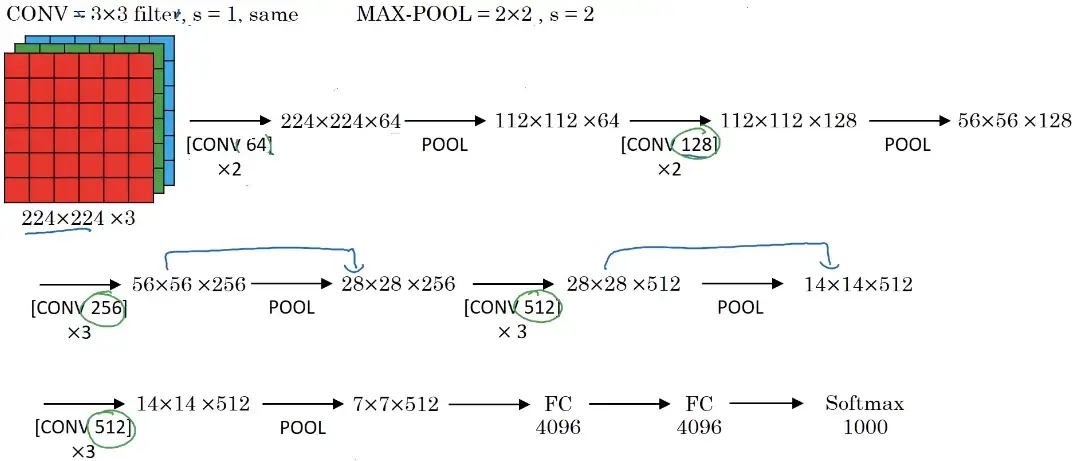

In [31]:
import tensorflow

# VGG16 is a pre-trained CNN model. 
conv_base = tensorflow.keras.applications.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3)
                  )

# Showing the convolutional layers.
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [38]:

# Deciding which layers are trained and frozen.
# Until 'block5_conv1' are frozen.
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Adding VGG16 and Creating CNN Model

In [41]:
# An empyty model is created.
_model = tensorflow.keras.models.Sequential()

# VGG16 is added as convolutional layer.
_model.add(conv_base)

# Layers are converted from matrices to a vector.
_model.add(tensorflow.keras.layers.Flatten())

# Our neural layer is added.
_model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
_model.add(tensorflow.keras.layers.Dense(5, activation='softmax'))

_model.compile(loss='binary_crossentropy',
          optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-5),
           metrics=['acc'])

 #  model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Showing the created model.
_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               6422784   
                                                                 
 dense_9 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [42]:
# Defining the directories that data are in.
train_dir = '/content/drive/MyDrive/dataset/train'
validation_dir = '/content/drive/MyDrive/dataset/validation'
test_dir = '/content/drive/MyDrive/dataset/test'

# Preprocessing and Data Augmentation
The dataset are divided as train, validation and test. The train dataset contains of 5 classes and 300 samples per classes. The validation dataset contains of 5 classes and 25 samples per classes. The remaining samples form the test dataset with 5 classes.

Only the train and the validation dataset apply preprocessing and data augmentation to prevent overfitting. The test dataset are not applied because test evaluation work on real data.

You can see how make data augmentation in the below image.

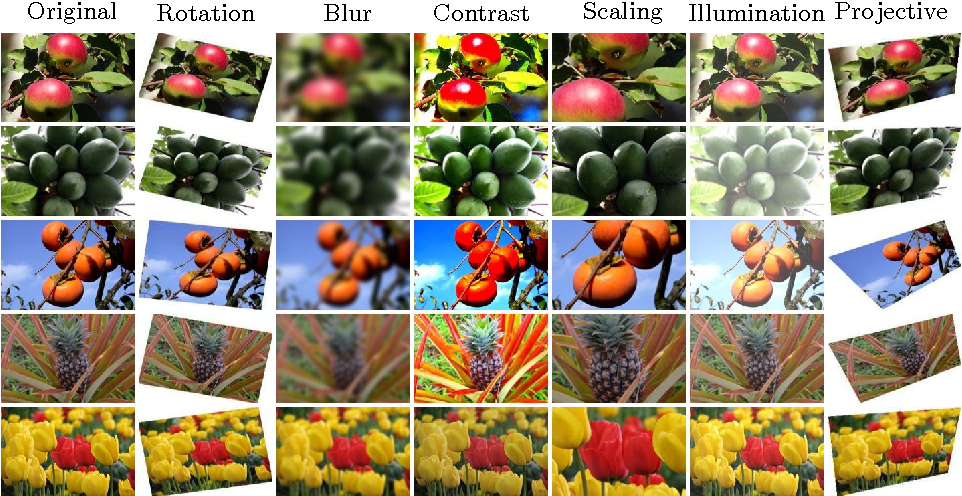


In [43]:
# We need to apply data augmentation methods to prevent overfitting.
train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255, # piksel değerleri 0-255'den 0-1 arasına getiriliyor.
      rotation_range=40, # istenilen artırma işlemleri yapılabilir.
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        )

Found 1500 images belonging to 5 classes.


In [44]:
# To validate the training process, we do not need augmented images.
validation_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        )


Found 125 images belonging to 5 classes.


# Training New Model

In [48]:
# Training the model.
history = _model.fit_generator(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
    )

<ipython-input-48-64f3bcdc61bc>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = _model.fit_generator(


Epoch 1/10
75/75 [==============================] - 26s 338ms/step - loss: 0.3669 - acc: 0.5767 - val_loss: 0.3053 - val_acc: 0.6880
Epoch 2/10
75/75 [==============================] - 25s 332ms/step - loss: 0.3240 - acc: 0.6567 - val_loss: 0.2710 - val_acc: 0.7120
Epoch 3/10
75/75 [==============================] - 25s 331ms/step - loss: 0.2909 - acc: 0.6833 - val_loss: 0.2620 - val_acc: 0.7280
Epoch 4/10
75/75 [==============================] - 25s 331ms/step - loss: 0.2718 - acc: 0.7300 - val_loss: 0.2427 - val_acc: 0.7520
Epoch 5/10
75/75 [==============================] - 25s 333ms/step - loss: 0.2487 - acc: 0.7500 - val_loss: 0.2191 - val_acc: 0.7840
Epoch 6/10
75/75 [==============================] - 26s 341ms/step - loss: 0.2353 - acc: 0.7660 - val_loss: 0.2083 - val_acc: 0.7920
Epoch 7/10
75/75 [==============================] - 25s 330ms/step - loss: 0.2149 - acc: 0.8027 - val_loss: 0.1985 - val_acc: 0.8000
Epoch 8/10
75/75 [==============================] - 25s 329ms/step - 

# Visualization results

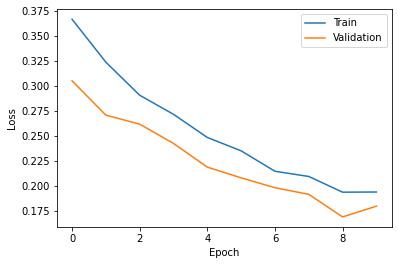

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()

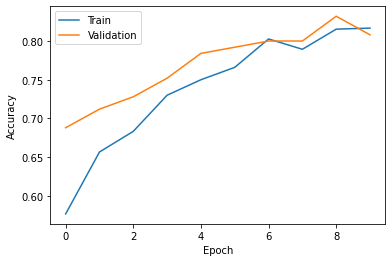

In [52]:
plt.plot(history.history["acc"], label="Train")
plt.plot(history.history["val_acc"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

# Saving the new model

In [54]:
# Saving the trained model to working directory.
_model.save('trained_tf_model.h5')

# Evaluation the test dataset

In [51]:
# To test the trained model, we do not need augmented images.
test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        )

# Printing the test results.
test_loss, test_acc = _model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 765 images belonging to 5 classes.


<ipython-input-51-e7e004774139>:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = _model.evaluate_generator(test_generator, steps=50)


test acc: 0.8104575276374817
